# One-Hour Linear Regression Project!

### Procedural Cheat Sheet
#### OESMN
- **O**btain
- **E**xplore
- **S**crub
- **M**odel
- I**N**terpret


### Checklist
- [ ] Have we handled missing data?
- [ ] Have we included feature engineering?
- [ ] Are we checking for overfitting?
- [ ] Are we avoiding data leakage?
- [ ] Is our model interpretable?
- [ ] Are we meeting the assumptions of the model?
    1. *There is a **linear relationship**.*
    - *Residuals are **distributed normally**.*
    - *Residuals are **homoskedastic**.*
    - *There is no **multicolinearity** between independent variables.*
    
---

#### Linear Regression - Assumptions
- Dependent / Independent Variable **Linearity**
    - *Check **scatterplot**.*
    - *Check **Correlation Coefficients**.*
- Residual **Normality**
    - *Check **Omnibus**-Value.*
    - *Check a **QQ**-plot.*
- Residual **Homoskedasticity**.
    - *Check **Durbin-Watson** Score.*
        - *~1.5 - ~2.5 is good.*
- Independent Variable **Multicolinearity**
    - *Check **Variance Inflation Factor**.*
    - *Check **Correlation Coefficients**.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Obtain

> *https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv*

In [2]:
# Let's model car sales!
df = pd.read_csv('../data/car_data.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Explore

In [5]:
num_cols = df.select_dtypes('number').columns
cat_cols = df.select_dtypes('object').columns

num_cols, cat_cols

(Index(['year', 'selling_price', 'km_driven'], dtype='object'),
 Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object'))

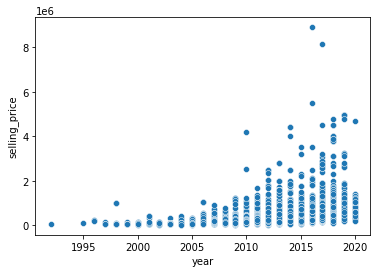

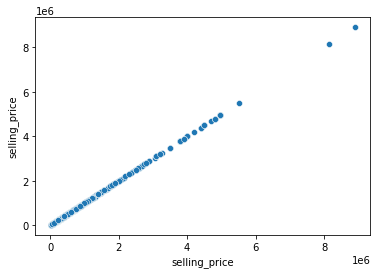

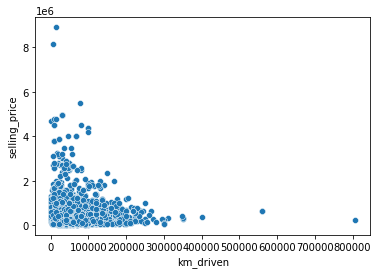

In [6]:
for c in num_cols:
    sns.scatterplot(x=c, y='selling_price', data=df)
    plt.show()

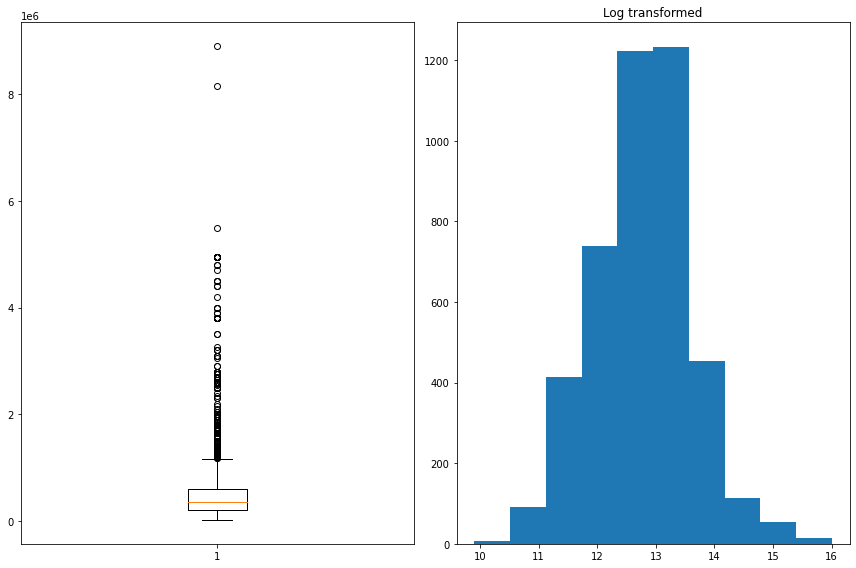

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8))
ax1.boxplot(df['selling_price'])
ax2.hist(np.log(df['selling_price']))
ax2.set(title='Log transformed')
fig.tight_layout()

In [8]:
for c in cat_cols[1:]:
    print(df[c].value_counts(normalize=True).head(10))
    print('#' * 8)
    print()

Diesel      0.496083
Petrol      0.489171
CNG         0.009217
LPG         0.005300
Electric    0.000230
Name: fuel, dtype: float64
########

Individual          0.747465
Dealer              0.229032
Trustmark Dealer    0.023502
Name: seller_type, dtype: float64
########

Manual       0.896774
Automatic    0.103226
Name: transmission, dtype: float64
########

First Owner             0.652535
Second Owner            0.254839
Third Owner             0.070046
Fourth & Above Owner    0.018664
Test Drive Car          0.003917
Name: owner, dtype: float64
########



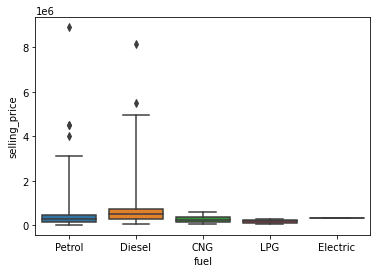

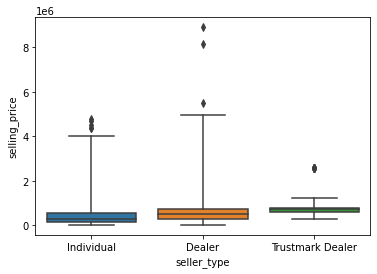

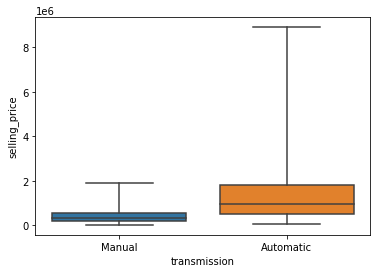

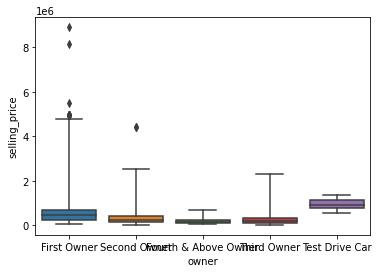

In [9]:
for c in cat_cols[1:]:
    sns.boxplot(x=c, y='selling_price', data=df, whis=10)
    plt.show()

## TODO
- Maybe log transform target.
- Include polynomial expansion of year?


- Encode `fuel` with `'other'`

# Scrub

In [10]:
# For statsmodels formula.
for c in cat_cols:
    df[c] = df[c].apply(lambda x: x.replace('&', 'and').replace(' ', '_'))
    display(df[c].value_counts())

Maruti_Swift_Dzire_VDI              69
Maruti_Alto_800_LXI                 59
Maruti_Alto_LXi                     47
Maruti_Alto_LX                      35
Hyundai_EON_Era_Plus                35
                                    ..
Mahindra_Scorpio_VLX_2WD_AT_BSIV     1
Tata_Indica_V2_DLS_BSII              1
MG_Hector_Sharp_Diesel_MT_BSIV       1
Mahindra_Supro_VX_8_Str              1
Ford_Ikon_1.4_ZXi                    1
Name: name, Length: 1491, dtype: int64

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

Individual          3244
Dealer               994
Trustmark_Dealer     102
Name: seller_type, dtype: int64

Manual       3892
Automatic     448
Name: transmission, dtype: int64

First_Owner               2832
Second_Owner              1106
Third_Owner                304
Fourth_and_Above_Owner      81
Test_Drive_Car              17
Name: owner, dtype: int64

In [11]:
# Feature engineering - extract manufacturer from `name` column.
maker_counts = (
    df['name']
    .apply(lambda x: x.split('_')[0])
    .value_counts(normalize=True)
)
TOP_MAKERS = set(maker_counts[maker_counts > 0.05].index)
TOP_MAKERS

{'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Tata'}

In [12]:
def encode_maker(s):
    """Docstring"""
    
    maker = s.split()[0]
    if maker in TOP_MAKERS:
        return maker
    return 'Other'

In [13]:
df['maker'] = df['name'].apply(encode_maker)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,maker
0,Maruti_800_AC,2007,60000,70000,Petrol,Individual,Manual,First_Owner,Other
1,Maruti_Wagon_R_LXI_Minor,2007,135000,50000,Petrol,Individual,Manual,First_Owner,Other
2,Hyundai_Verna_1.6_SX,2012,600000,100000,Diesel,Individual,Manual,First_Owner,Other
3,Datsun_RediGO_T_Option,2017,250000,46000,Petrol,Individual,Manual,First_Owner,Other
4,Honda_Amaze_VX_i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second_Owner,Other
...,...,...,...,...,...,...,...,...,...
4335,Hyundai_i20_Magna_1.4_CRDi_(Diesel),2014,409999,80000,Diesel,Individual,Manual,Second_Owner,Other
4336,Hyundai_i20_Magna_1.4_CRDi,2014,409999,80000,Diesel,Individual,Manual,Second_Owner,Other
4337,Maruti_800_AC_BSIII,2009,110000,83000,Petrol,Individual,Manual,Second_Owner,Other
4338,Hyundai_Creta_1.6_CRDi_SX_Option,2016,865000,90000,Diesel,Individual,Manual,First_Owner,Other


In [14]:
if 'name' in df.columns:
    df.drop('name', axis=1, inplace=True)

## Transform Target

<AxesSubplot:>

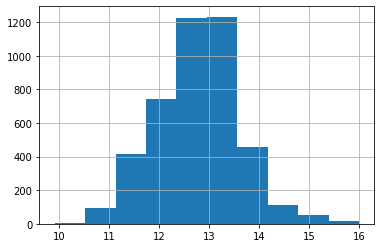

In [15]:
df['log_price'] = np.log(df['selling_price'])
df['log_price'].hist()

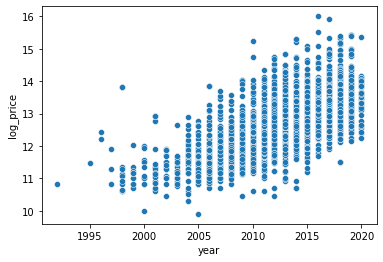

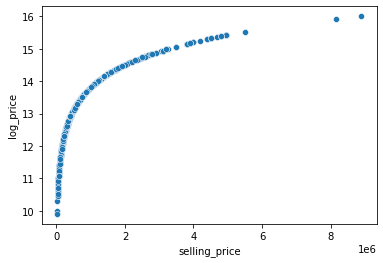

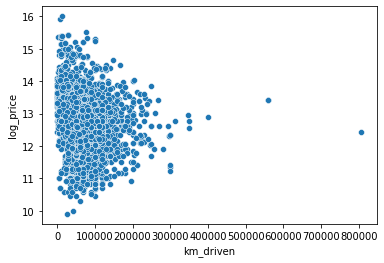

In [16]:
for c in num_cols:
    sns.scatterplot(x=c, y='log_price', data=df)
    plt.show()

## $\text{year}^2$

In [17]:
df['year_squared'] = df['year'] ** 2
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,maker,log_price,year_squared
0,2007,60000,70000,Petrol,Individual,Manual,First_Owner,Other,11.002100,4028049
1,2007,135000,50000,Petrol,Individual,Manual,First_Owner,Other,11.813030,4028049
2,2012,600000,100000,Diesel,Individual,Manual,First_Owner,Other,13.304685,4048144
3,2017,250000,46000,Petrol,Individual,Manual,First_Owner,Other,12.429216,4068289
4,2014,450000,141000,Diesel,Individual,Manual,Second_Owner,Other,13.017003,4056196
...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second_Owner,Other,12.923910,4056196
4336,2014,409999,80000,Diesel,Individual,Manual,Second_Owner,Other,12.923910,4056196
4337,2009,110000,83000,Petrol,Individual,Manual,Second_Owner,Other,11.608236,4036081
4338,2016,865000,90000,Diesel,Individual,Manual,First_Owner,Other,13.670485,4064256


# Train-Test-Split

In [18]:
X = df.drop(columns=['selling_price', 'log_price'])
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=51)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3255, 8), (1085, 8), (3255,), (1085,))

In [19]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns

## OHE

In [20]:
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

# Recreate DFs
X_train_cat = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names(cat_cols))
X_test_cat = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names(cat_cols))

X_train_cat

,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth_and_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3250,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3251,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3252,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3253,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Scale

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

# Recreate DFs
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_cols)

X_train_scaled

,year,km_driven,year_squared
0,-0.982530,-0.197789,-0.983420
1,-0.030492,0.278443,-0.031562
2,0.445527,-0.860373,0.445078
3,0.445527,2.141961,0.445078
4,0.445527,0.071386,0.445078
...,...,...,...
3250,-0.030492,-0.135672,-0.031562
3251,-0.030492,2.349019,-0.031562
3252,-0.506511,-0.485020,-0.507727
3253,-0.506511,-0.032143,-0.507727


## Combine Data

In [22]:
X_train_processed = pd.concat([X_train_scaled, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_cat], axis=1)

X_train_processed.shape, X_test_processed.shape

((3255, 14), (1085, 14))

In [23]:
X_train_processed

,year,km_driven,year_squared,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth_and_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,-0.982530,-0.197789,-0.983420,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.030492,0.278443,-0.031562,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.445527,-0.860373,0.445078,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.445527,2.141961,0.445078,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.445527,0.071386,0.445078,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,-0.030492,-0.135672,-0.031562,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3251,-0.030492,2.349019,-0.031562,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3252,-0.506511,-0.485020,-0.507727,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3253,-0.506511,-0.032143,-0.507727,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# Model

In [24]:
# f = f'{y_train.name}~{"+".join(X_train_processed.columns)}'
# f

In [25]:
model = sm.OLS(y_train.reset_index(drop=True), 
               sm.add_constant(X_train_processed)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     510.2
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:51:19   Log-Likelihood:                -2149.7
No. Observations:                3255   AIC:                             4329.
Df Residuals:                    3240   BIC:                             4421.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           13.3135      0.087    152.662      0.000      13.142      13.484
year                           -36.4596      6.045     -6.031      0.000     -48.312     -24.607
km_driven                        0.0051      0.010      0.504      0.614      -0.015       0.025
year_squared                    36.9387      6.046      6.109      0.000      25.084      48.794
fuel_Diesel                      0.5771      0.083      6.971      0.000       0.415       0.739
fuel_Electric                    0.1861      0.478      0.389      0.697      -0.751       1.123
fuel_LPG                        -0.0145      0.140     -0.103      0.918      -0.290       0.261
fuel_Petrol                      0.0643      0.083      0.776      0.438      -0.098       0.227
seller_type_Individual          -0.1678      0.021     -7.950      0.000      -0.209      -0.126
seller_type_Trustmark_Dealer     0.3141      0.055      5.666      0.000       0.205       0.423
transmission_Manual             -0.7980      0.028    -28.943      0.000      -0.852      -0.744
owner_Fourth_and_Above_Owner    -0.1924      0.060     -3.184      0.001      -0.311      -0.074
owner_Second_Owner              -0.0598      0.022     -2.766      0.006      -0.102      -0.017
owner_Test_Drive_Car             0.0591      0.133      0.444      0.657      -0.202       0.320
owner_Third_Owner               -0.1012      0.036     -2.849      0.004      -0.171      -0.032
==============================================================================
Omnibus:                       36.536   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.240
Skew:                           0.076   Prob(JB):                     2.26e-13
Kurtosis:                       3.638   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

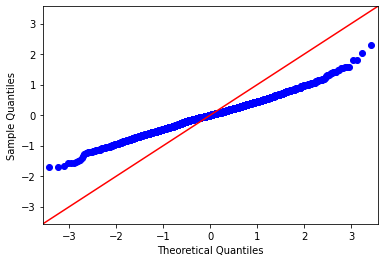

In [26]:
sm.graphics.qqplot(model.resid, line='45');

<AxesSubplot:>

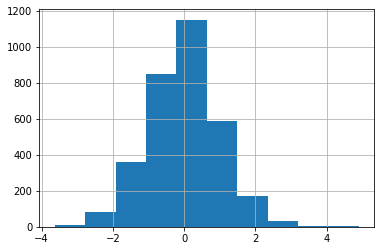

In [27]:
scaled_resid = StandardScaler().fit_transform(pd.DataFrame(model.resid))
pd.DataFrame(scaled_resid)[0].hist()

In [28]:
linreg = LinearRegression()
linreg.fit(X_train_processed, y_train)

LinearRegression()

In [29]:
y_pred_train = linreg.predict(X_train_processed)
y_pred_test = linreg.predict(X_test_processed)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
print(f"""
MSE Train: {mean_squared_error(y_train, y_pred_train)}
MSE Test:  {mean_squared_error(y_test, y_pred_test)}

MAE Train: {mean_absolute_error(y_train, y_pred_train)}
MAE Test:  {mean_absolute_error(y_test, y_pred_test)}
""")


MSE Train: 0.21936281141044192
MSE Test:  0.21473002397001892

MAE Train: 0.36278605473380343
MAE Test:  0.35735291185907037



# Interpret